In [ ]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay
import scikitplot as skplt
from matplotlib.pyplot import figure
import scikitplot.estimators as esti


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay
import scikitplot as skplt
from matplotlib.pyplot import figure
import scikitplot.estimators as esti


Reading all the files

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import os

In [ ]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/DataSet

/content/drive/MyDrive/DataSet


In [ ]:
import os

# List files and directories in the current working directory
print(os.listdir())

['Dataset.zip', '.ipynb_checkpoints', 'trainmean.csv', 'train_nooutlier.parquet', 'test.csv', 'valmed.csv', 'valmean.csv', 'trainmea.csv', 'testmean.csv', 'trainmed.csv', 'testmed.csv', 'train1h.csv', 'val1h.csv', 'test1h.csv', 'train_nooutlier1h.csv', 'train.parquet', 'test.parquet', 'val.parquet', 'val.csv', 'dftrainnooutlier.csv', 'dftrainindex.csv', 'dfvalindex.csv', 'train.csv']


In [ ]:
import pandas as pd
dftrain=pd.read_parquet("./train.parquet")       
dftest=pd.read_parquet("./test.parquet")   
dfval=pd.read_parquet("./val.parquet")
dftrain=pd.read_csv("./train.csv")       
dftest=pd.read_csv("./test.csv")   
dfval=pd.read_csv("./val.csv")
dftrain_nooutlier=pd.read_parquet("./train_nooutlier.parquet")
dftrainmed=pd.read_csv("./trainmed.csv")
dftestmed=pd.read_csv("./testmed.csv")
dfvalmed=pd.read_csv("./valmed.csv")
dftrainmean=pd.read_csv("./trainmea.csv")
dftestmean=pd.read_csv("./testmean.csv")
dfvalmean=pd.read_csv("./valmean.csv")
dftrain1h=pd.read_csv("./train1h.csv")
dftrain_nooutlier1h=pd.read_csv("./train_nooutlier1h.csv")
dftest1h=pd.read_csv("./test1h.csv")
dfval1h=pd.read_csv("./val1h.csv")
dftrainindex=pd.read_csv("./dftrainindex.csv")
dfvalindex=pd.read_csv("./dfvalindex.csv")

In [ ]:
dftrainindex

,0
0,0
1,1
2,2
3,3
4,4
...,...
3687367,3520
3687368,3521
3687369,3522
3687370,3523


In [ ]:
dftrainindex['specifictime'] = dftrainindex.index
dfvalindex['specifictime'] = dfvalindex.index

Models


In [ ]:
dftrainmed

,key,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,type
0,user100_UBE,13.0,16.000,11.500,4.500,18.000,25.0,18.0,0.0,0.0,0.0
1,user100_UGE,13.0,13.175,5.500,4.000,14.140,11.0,15.0,0.0,0.0,1.0
2,user101_UBE,15.0,15.500,9.595,3.830,17.000,26.0,20.0,0.0,0.0,0.0
3,user101_UGE,14.0,17.000,40.000,1.000,18.880,45.0,21.0,0.0,0.0,1.0
4,user102_UBE,14.0,12.850,7.000,6.000,13.805,13.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,user98_UGE,15.0,12.500,9.200,3.500,13.000,19.0,15.0,0.0,0.0,1.0
296,user99_UBE,11.0,0.000,0.000,0.000,0.000,177.0,25.0,0.0,0.0,0.0
297,user99_UGE,13.0,5.000,2.250,1.500,5.000,4.0,9.0,0.0,0.0,1.0
298,user9_UBE,14.0,17.500,4.000,3.500,19.290,8.0,21.0,0.0,0.0,0.0


In [ ]:
dftestmean

,key,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,type
0,user201_UBE,13.265162,25.345731,230.270630,80.930903,81.701298,128.678844,24.751313,0.019045,0.018539,0.0
1,user201_UGE,14.322520,54.707085,120.587049,136.074315,134.744167,72.375835,21.061401,0.019155,0.020119,1.0
2,user202_UBE,13.099180,37.735797,130.838073,58.779485,65.685586,81.460562,21.640277,0.019428,0.025522,0.0
3,user202_UGE,12.234105,89.690817,81.994151,42.552399,179.544373,78.846777,32.365259,0.010544,0.009643,1.0
4,user203_UBE,15.236731,25.365027,151.556583,276.740127,133.088155,66.971493,26.823928,0.026238,0.006841,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95,user248_UGE,13.864031,99.029282,74.468416,77.459849,135.088286,22.892308,15.271225,0.022715,0.029461,1.0
96,user249_UBE,14.487153,66.696588,94.760761,276.352984,239.103677,46.316544,48.329663,0.016714,0.014945,0.0
97,user249_UGE,12.884896,68.200728,104.778289,7.631940,36.643243,43.733254,11.068179,0.005002,0.007563,1.0
98,user250_UBE,12.960323,1124.870897,49.092437,13.665150,153.660547,42.117901,16.217563,0.019541,0.021107,0.0


In [ ]:
dftrainmed

,key,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,type
0,user100_UBE,13.0,16.000,11.500,4.500,18.000,25.0,18.0,0.0,0.0,0.0
1,user100_UGE,13.0,13.175,5.500,4.000,14.140,11.0,15.0,0.0,0.0,1.0
2,user101_UBE,15.0,15.500,9.595,3.830,17.000,26.0,20.0,0.0,0.0,0.0
3,user101_UGE,14.0,17.000,40.000,1.000,18.880,45.0,21.0,0.0,0.0,1.0
4,user102_UBE,14.0,12.850,7.000,6.000,13.805,13.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
295,user98_UGE,15.0,12.500,9.200,3.500,13.000,19.0,15.0,0.0,0.0,1.0
296,user99_UBE,11.0,0.000,0.000,0.000,0.000,177.0,25.0,0.0,0.0,0.0
297,user99_UGE,13.0,5.000,2.250,1.500,5.000,4.0,9.0,0.0,0.0,1.0
298,user9_UBE,14.0,17.500,4.000,3.500,19.290,8.0,21.0,0.0,0.0,0.0


In [ ]:
dftrain.columns

Index(['Unnamed: 0', 'day', 'hour', 'specifictime', 'SYN', 'SYN-ACK', 'ACK',
       'SENDPCK', 'DELAYFR', 'DELAYFDNS', 'RETRAND', 'RETANSU', 'type', 'key'],
      dtype='object')

Taking Aggregated on mean for individual user

> Indented block



In [ ]:
X_train=dftrainmean[[ 'hour', 'SYN', 'SYN-ACK', 'ACK', 'SENDPCK',
       'DELAYFR', 'DELAYFDNS', 'RETRAND', 'RETANSU', 'type',]]
X_test=dftestmean[[ 'hour', 'SYN', 'SYN-ACK', 'ACK', 'SENDPCK',
       'DELAYFR', 'DELAYFDNS', 'RETRAND', 'RETANSU', 'type']]

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hour       300 non-null    float64
 1   SYN        300 non-null    float64
 2   SYN-ACK    300 non-null    float64
 3   ACK        300 non-null    float64
 4   SENDPCK    300 non-null    float64
 5   DELAYFR    300 non-null    float64
 6   DELAYFDNS  300 non-null    float64
 7   RETRAND    300 non-null    float64
 8   RETANSU    300 non-null    float64
 9   type       300 non-null    float64
dtypes: float64(10)
memory usage: 23.6 KB


In [ ]:
# X_train1=X_train.loc[:,:'target_value'].copy().pct_change(1)
# X_train1

In [ ]:
# X_test1=X_test.loc[:,:'target_value'].copy().pct_change(1)

In [ ]:
# X_test1.fillna(method='bfill', inplace=True)
# X_train1.fillna(method='bfill', inplace=True)

In [ ]:
y_train=dftrainmean["type"].astype(int)
y_test=dftestmean["type"].astype(int)

In [ ]:
# X_train1.replace([np.inf, -np.inf], np.nan)
# X_test1.replace([np.inf, -np.inf], np.nan)


In [ ]:
pip install StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for StandardScaler: filename=StandardScaler-0.5-py3-none-any.whl size=2613 sha256=48aa343aa03eaf3be1348893a5101414d82af46f0b729531ba184f56be311b11
  Stored in directory: /root/.cache/pip/wheels/98/7d/ec/7ea52e96c7cf25f808c75a53cb1db1ef8e7c071debbc983276
Successfully built StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
#dftrain['key'] = dftrain['key'].apply(pd.to_numeric, errors='coerce')

In [ ]:
scalerfit = StandardScaler()
Scalerfit = scalerfit.fit(X_train)

In [ ]:
X_train=Scalerfit.transform(X_train)

In [ ]:
#using scaler fitted on train data to scale the test dataIt is a good practice to fit the scaler on the training data and then use it to transform the testing data. 
#This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.
X_test=Scalerfit.transform(X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, RandomizedSearchCV # Split de dataset et optimisation des hyperparamètres

Logistic Regression : 1.0


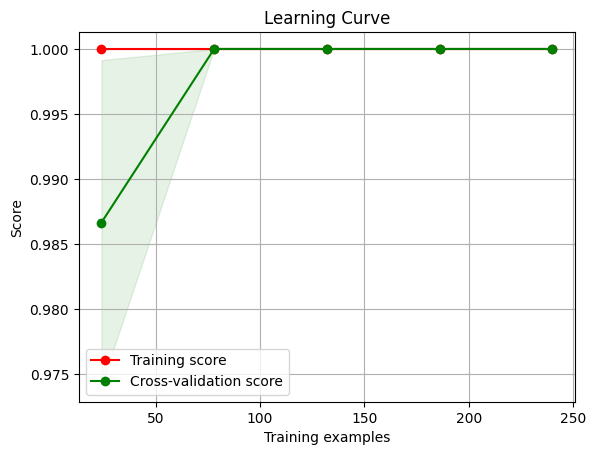

Decision Tree Classification : 1.0


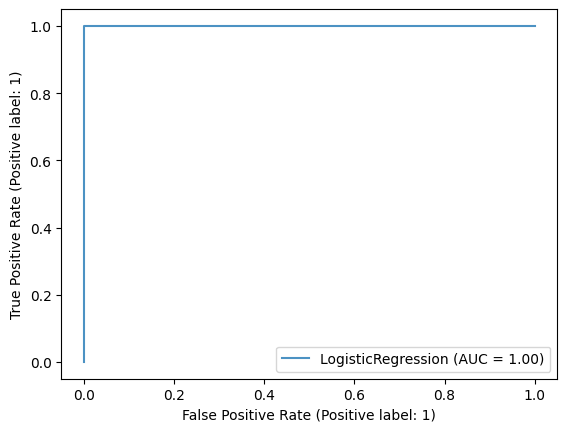

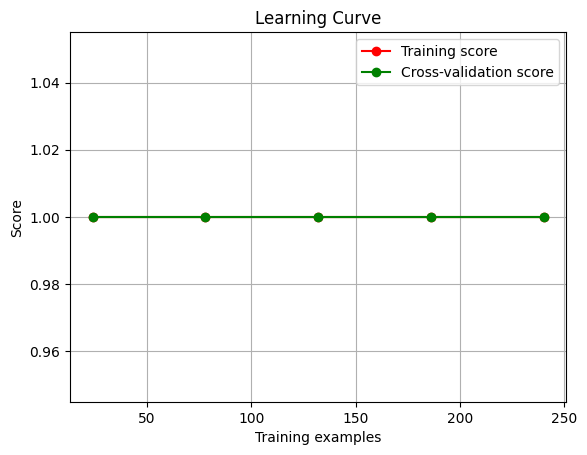

Random Forest Classification : 1.0


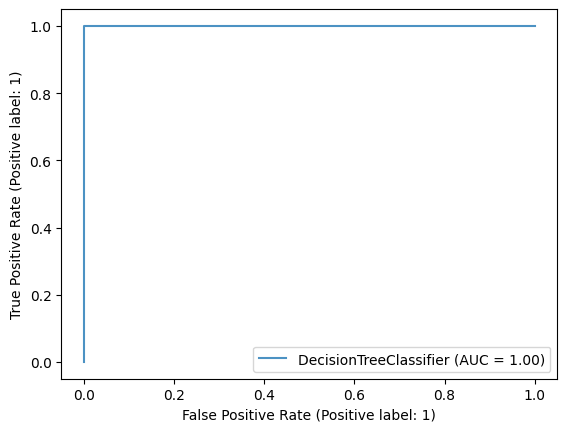

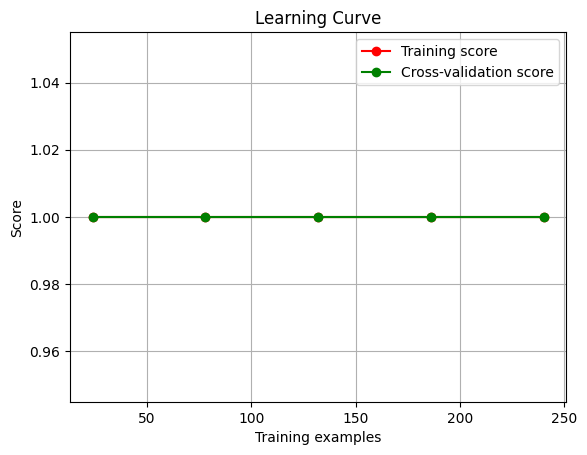

Gradient Boosting Classification : 1.0


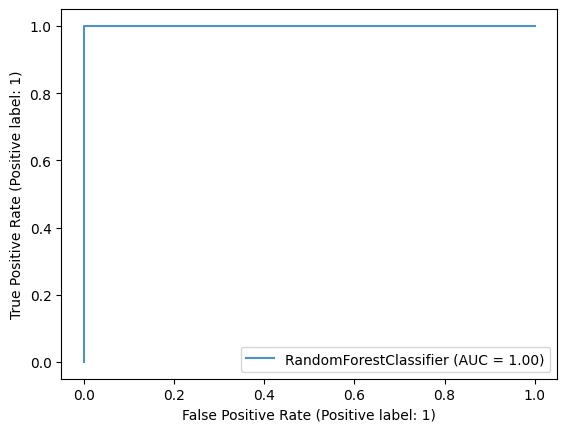

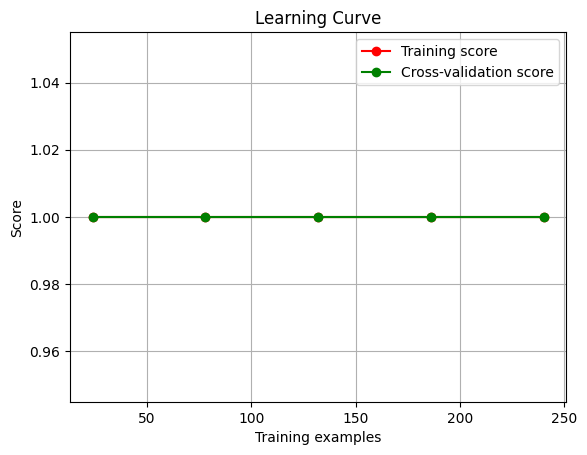

Ada Boosting Classification : 1.0


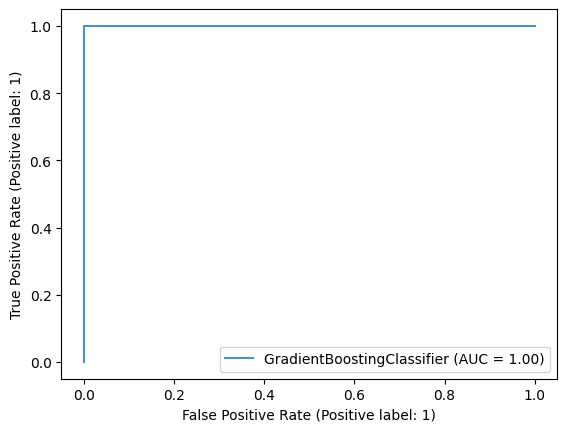

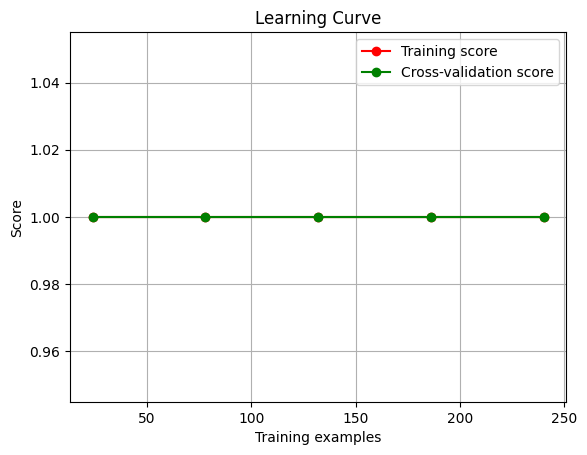

Extra Tree Classification : 1.0


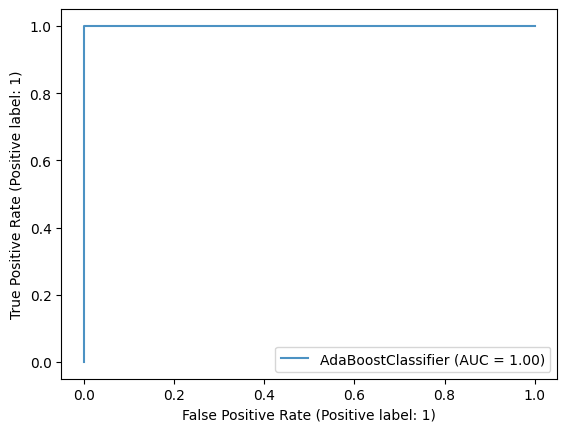

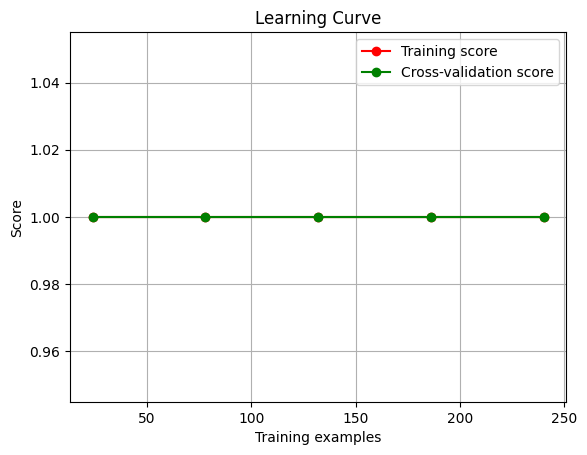

K-Neighbors Classification : 0.97


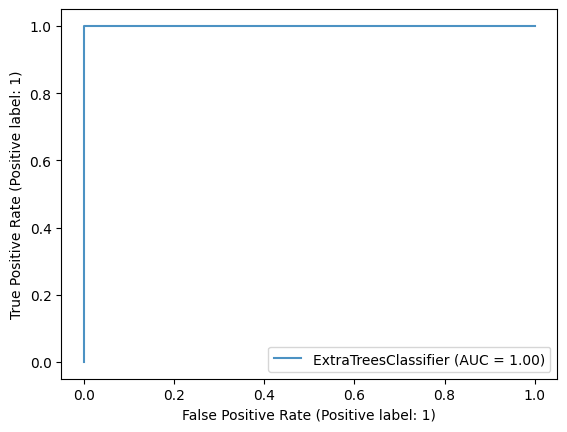

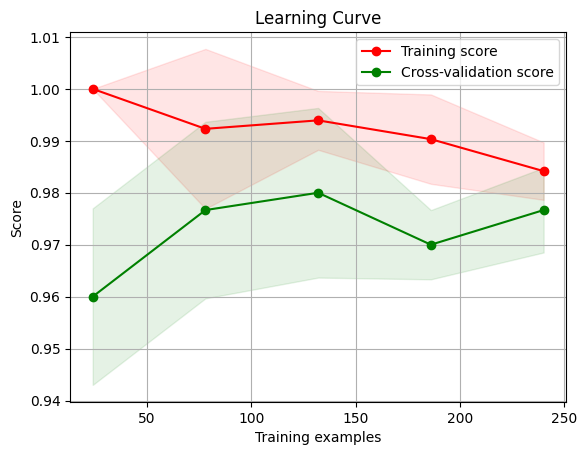

Support Vector Classification : 0.97


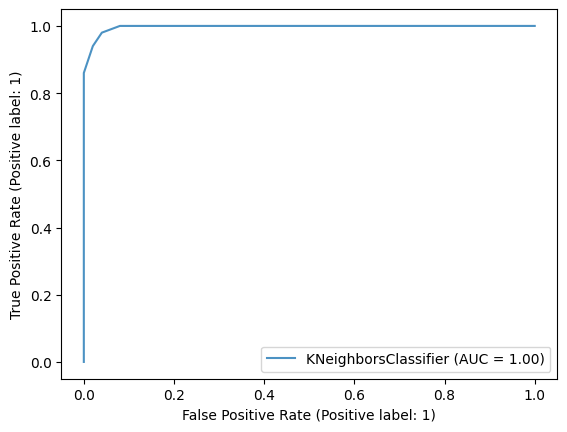

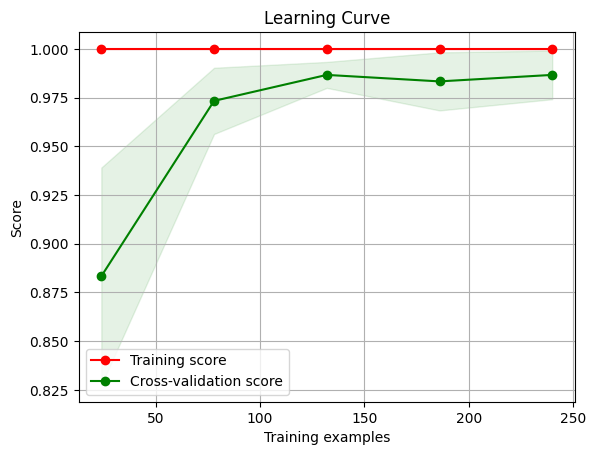

Gausian Naive Bayes : 1.0


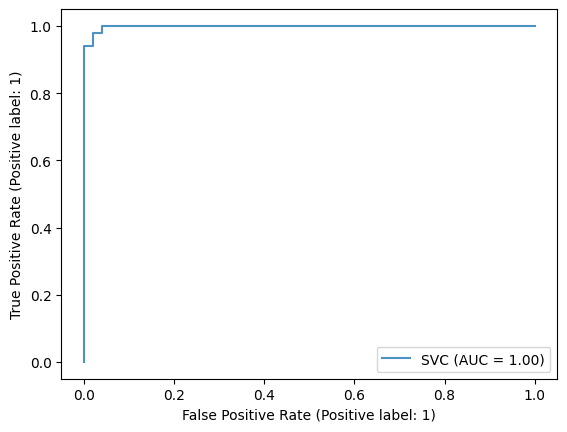

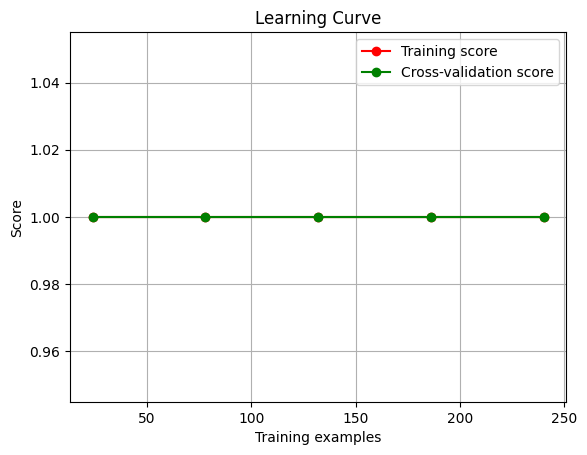

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

XGBoost Classification : 1.0
[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WARNING: ../src/learner.cc:767: 
Parameters: { "al_metric" } are not used.

[02:20:10] WAR

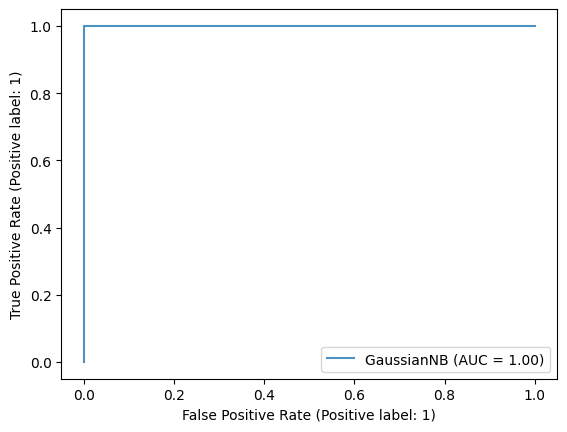

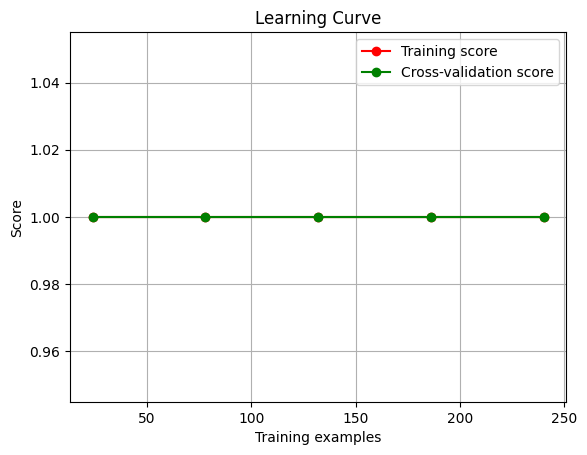

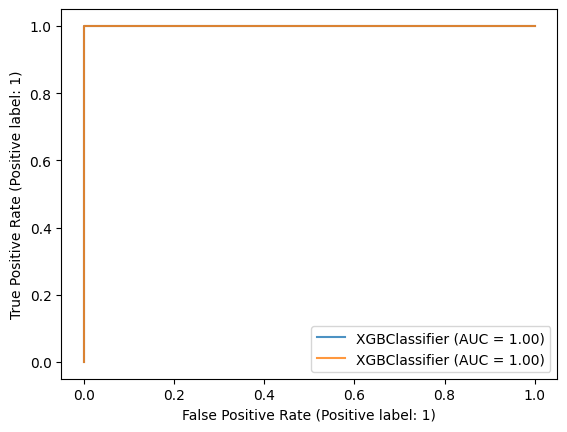

In [ ]:
classifiers=[['Logistic Regression :',LogisticRegression()], 
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=30, max_features=7, max_depth=None, min_samples_split=2)],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier(n_estimators=100)],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier(n_neighbors=7)],
       ['Support Vector Classification :',SVC()],
       ['Gausian Naive Bayes :',GaussianNB()],

       ['XGBoost Classification :', xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=20, al_metric=["auc", "error"])],
      ]
cla_pred=[]
max_accuracy = float('-inf')
for index, (name,model) in enumerate(classifiers):
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    accuracy_ = accuracy_score(y_test,predictions)
    if accuracy_ > max_accuracy:
        max_index = index
    print(name, accuracy_)
    esti.plot_learning_curve(model, X, y)
    plt.show()
    


    ax = plt.gca()
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
disp.plot(ax=ax, alpha=0.8)

# DNN

In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import tensorflow
import keras.models
from keras.layers import Activation, Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow import keras


In [ ]:
classifier = keras.models.Sequential()
classifier.add(Dense(units=5, input_dim=10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
#dropout l2 regularisation

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=300 , epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 0.6931 - binary_accuracy: 0.4900
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - binary_accuracy: 0.5033
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 0.6931 - binary_accuracy: 0.6567
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - binary_accuracy: 0.5067
Epoch 7/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6931 - binary_accuracy: 0.8767
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - binary_accuracy: 0.6433
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6930 - binary_accuracy: 0.5567
Epoch 10/500
1/1 [==============================] - 0s 13

In [ ]:
classifier.evaluate(X_train, y_train)

10/10 [==============================] - 0s 3ms/step - loss: 0.1875 - binary_accuracy: 1.0000


[0.18750299513339996, 1.0]

In [ ]:
classifier.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1876 - binary_accuracy: 1.0000


[0.18756189942359924, 1.0]

Taking median to aggregate

In [ ]:
X_train=dftrainmed[[ 'hour', 'SYN', 'SYN-ACK', 'ACK', 'SENDPCK',
       'DELAYFR', 'DELAYFDNS', 'RETRAND', 'RETANSU', 'type',]]
X_test=dftestmed[[ 'hour', 'SYN', 'SYN-ACK', 'ACK', 'SENDPCK',
       'DELAYFR', 'DELAYFDNS', 'RETRAND', 'RETANSU', 'type']]

In [ ]:
X_train

,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,type
0,13.0,16.000,11.500,4.500,18.000,25.0,18.0,0.0,0.0,0.0
1,13.0,13.175,5.500,4.000,14.140,11.0,15.0,0.0,0.0,1.0
2,15.0,15.500,9.595,3.830,17.000,26.0,20.0,0.0,0.0,0.0
3,14.0,17.000,40.000,1.000,18.880,45.0,21.0,0.0,0.0,1.0
4,14.0,12.850,7.000,6.000,13.805,13.0,18.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
295,15.0,12.500,9.200,3.500,13.000,19.0,15.0,0.0,0.0,1.0
296,11.0,0.000,0.000,0.000,0.000,177.0,25.0,0.0,0.0,0.0
297,13.0,5.000,2.250,1.500,5.000,4.0,9.0,0.0,0.0,1.0
298,14.0,17.500,4.000,3.500,19.290,8.0,21.0,0.0,0.0,0.0


In [ ]:
X_test

,hour,SYN,SYN-ACK,ACK,SENDPCK,DELAYFR,DELAYFDNS,RETRAND,RETANSU,type
0,14.0,21.750,42.50,2.000,22.16,50.0,23.0,0.0,0.0,0.0
1,15.0,14.000,19.00,2.085,15.75,24.0,16.0,0.0,0.0,1.0
2,17.0,13.065,41.00,2.250,16.00,45.0,16.0,0.0,0.0,0.0
3,12.0,13.000,9.66,1.500,14.40,38.0,21.0,0.0,0.0,1.0
4,18.0,17.000,3.00,2.670,17.75,15.0,22.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,15.0,9.000,3.00,4.000,10.00,6.0,12.0,0.0,0.0,1.0
96,16.0,12.500,10.00,3.000,12.50,18.0,14.0,0.0,0.0,0.0
97,14.0,4.450,33.60,0.380,4.44,29.0,4.0,0.0,0.0,1.0
98,18.0,10.330,2.83,3.000,10.67,4.0,11.0,0.0,0.0,0.0


In [ ]:
y_train=dftrainmed["type"].astype(int)
y_test=dfvalmed["type"].astype(int)

In [ ]:
scaler = StandardScaler()
Scalerfit=scaler.fit(X_train)

In [ ]:
X_train=Scalerfit.transform(X_train)

In [ ]:
#using minmax fitted on train data to scale the test dataIt is a good practice to fit the scaler on the training data and then use it to transform the testing data. 
#This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.
X_test=Scalerfit.transform(X_test)

Logistic Regression : 1.0


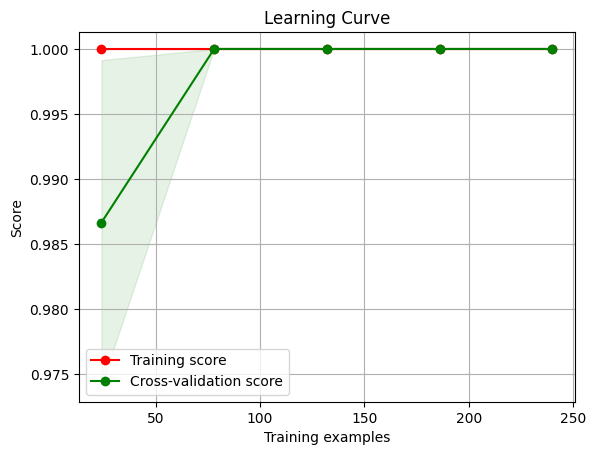

Gradient Boosting Classification : 1.0


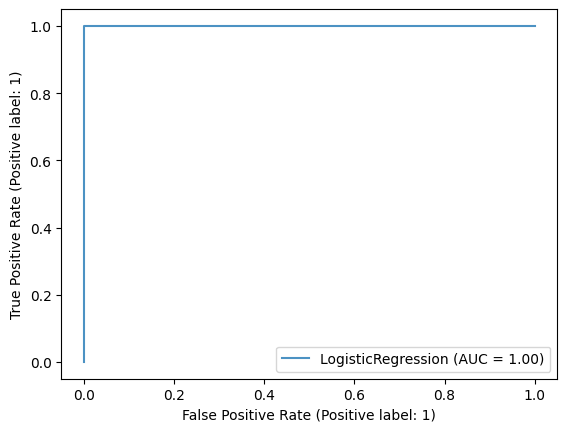

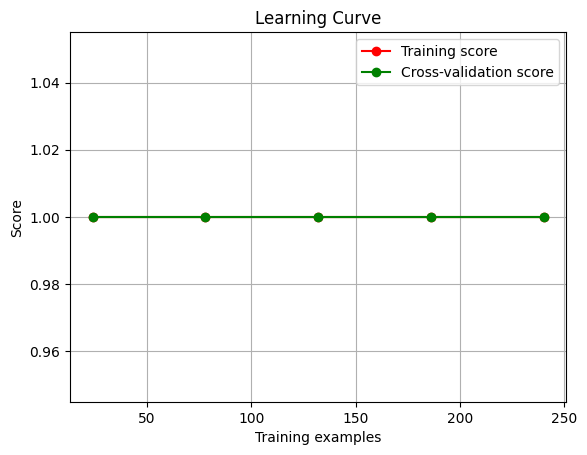

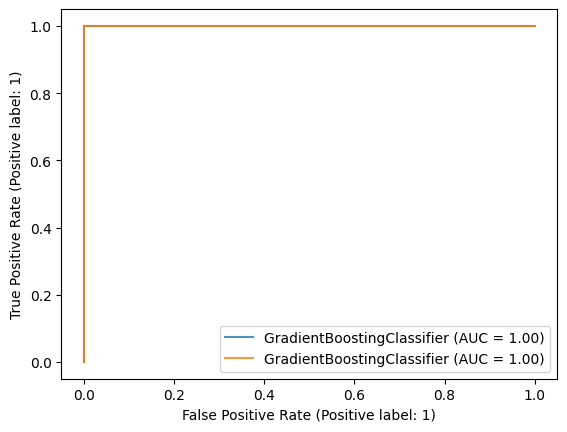

In [ ]:
classifiers=[['Logistic Regression :',LogisticRegression()], 
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],

      ]
cla_pred=[]
max_accuracy = float('-inf')
for index, (name,model) in enumerate(classifiers):
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    accuracy_ = accuracy_score(y_test,predictions)
    if accuracy_ > max_accuracy:
        max_index = index
    print(name, accuracy_)

    esti.plot_learning_curve(model, X, y)
    plt.show()
    


    ax = plt.gca()
    disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
disp.plot(ax=ax, alpha=0.8)

In [ ]:
classifier = keras.models.Sequential()
classifier.add(Dense(units=5, input_dim=10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))
#dropout l2 regularisation

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
survivalANN_Model=classifier.fit(X_train, y_train, batch_size=300 , epochs=500, verbose=1)

Epoch 1/500
1/1 [==============================] - 1s 753ms/step - loss: 0.6932 - binary_accuracy: 0.3367
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 0.6932 - binary_accuracy: 0.4800
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.6931 - binary_accuracy: 0.5100
Epoch 9/500
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s

In [ ]:
classifier.evaluate(X_train, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 0.0451 - binary_accuracy: 1.0000


[0.04511004686355591, 1.0]

In [ ]:
classifier.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.0456 - binary_accuracy: 1.0000


[0.04560176283121109, 1.0]

In [ ]:
!pip install powerbiclient

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.9/672.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.9 MB/s eta 0:00:00


In [ ]:
!pip install powerbiclient


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication
import pandas as pd
from google.colab import drive
from google.colab import output
from urllib import request
import zipfile
import requests

In [ ]:
# mount Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/DataSet

/content/drive/MyDrive/DataSet


In [ ]:
file_url = "https://drive.google.com/file/d/1py7U4eepXT79N2B_0m1LPtj6Epmk9JOP/view?usp=share_link"
	
r = requests.get(file_url, stream = True)
with open("/content/drive/My Drive/Dataset.zip","wb" ) as file:
	for block in r.iter_content(chunk_size = 1024):
		if block:
			file.write(block)
   
compressed_file = zipfile.ZipFile('/content/drive/My Drive/Dataset.zip')

csv_file = compressed_file.open('Dataset.csv')
data = pd.read_csv(csv_file, delimiter=";", names=['hour', 'SYN', 'SYN-ACK', 'ACK', 'SENDPCK', 'DELAYFR', 'DELAYFDNS', 'RETRAND', 'RETANSU', 'type'])

BadZipFile: ignored